In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, fowlkes_mallows_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM

import torch

In [10]:
!pip install python-ternary

In [353]:
# %run xrdutils.py
from xrdc import xrdutils as xdu
from xrdc import visualization as vis
from xrdc import grid_data
from xrdc import datasets
from xrdc import metrics

In [12]:
# def augment(X, y, rmin = .99, rmax = 1.01, N = 10, scale_type = 'scale'):
#     """
#     Take N transformed samples of each row in X.
    
#     Return new X, y (with y matching source pattern index)
#     """
#     y = np.hstack([np.repeat(v, N) for v in y])[None, :].T
#     X = np.vstack([np.vstack([xdu.mutate_pattern(row, np.random.uniform(rmin, rmax), q  / 10,
#                                            scale_type = scale_type, peak_height = True,
#                                  default_grid = False) for _ in range(N)])
#             for row in X])
#     return X, y

In [13]:
path = "../inputs/synthetic_instance_data/./synthinst72_t0_n21_p20_r50_s1_inst.txt"
path = "../xrdc/inputs/synthetic_instance_data/synthinst69_t0_n21_p100_r50_s1_inst.txt"

In [14]:
df = pd.read_csv(path, skiprows=16, header = None, skipfooter = 231)
df[0] = df.iloc[:, 0].apply(lambda x: x.split('=')[1])
df = df.astype(float)

/Users/ollie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [15]:
composition = pd.read_csv(path, skiprows = 11, skipfooter = 465, header = None)
composition[0] = composition.iloc[:, 0].apply(lambda x: x.split('=')[1])
composition = composition.astype(float).T.values

/Users/ollie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
q = df.iloc[0].values
I = df[1:232].values

In [729]:
oldq, oldI = q, I

In [724]:
# TODO revisit log transformation and why it doesn't seem to help
# logq = logtransform(q, I[0])[0]
# logq_I = np.vstack([logtransform(q, I[i])[1] for i in range(len(I))])

# q, I = logq, logq_I

In [82]:
%matplotlib inline

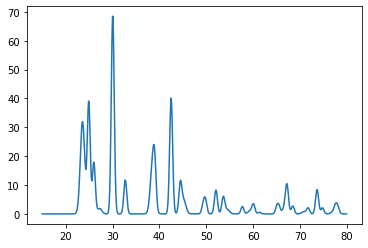

In [83]:
plt.plot(q, I[13])
#plt.plot(q, I[0])

In [84]:
# def csim(a, b):
#     return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [85]:
# composition cosine similarities
norm = np.linalg.norm(composition, axis = 1)
similarity = np.dot(composition, composition.T) / np.outer(norm, norm)

In [86]:
asame = (similarity > (1 - 1e-10))
assert asame.sum() == 231

In [87]:
sim_t = .9927
# sim_t = .995

# sim_t = .98

# sim_t = .992

nmat = (similarity > sim_t)

X = np.vstack([I[row] for row in nmat])

Y = np.hstack([np.repeat(i, n) for i, n in enumerate(nmat.sum(axis = 0))])

X.shape, Y.shape

nmat.mean() * 231

6.87012987012987

In [99]:
q.shape

(1771,)

In [97]:
X.shape

(1587, 650)

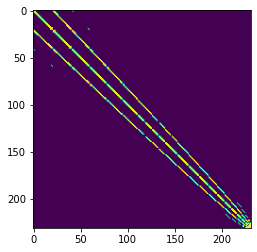

In [732]:
plt.imshow((similarity > sim_t))

3

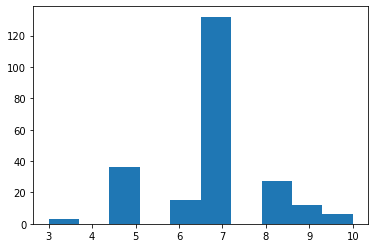

In [733]:
plt.hist(nmat.sum(axis = 0))
nmat.sum(axis = 0).min()

<IPython.core.display.Javascript object>


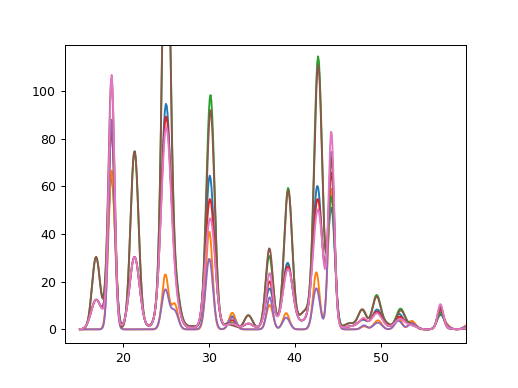

In [476]:
[plt.plot(q, i) for i in X[Y == 120]];

<IPython.core.display.Javascript object>


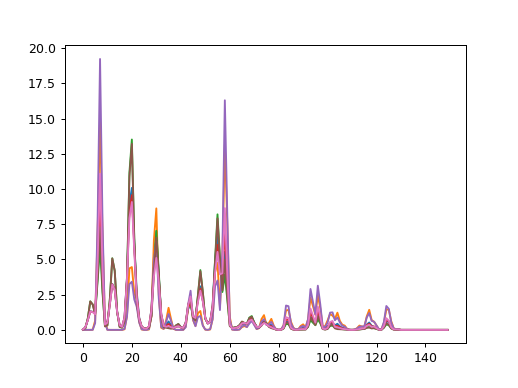

In [481]:
[plt.plot(i) for i in X[Y.T[0] == 120]];

Sanity check: cosine similarity of xrd patterns within and without groups:

In [734]:
row = I[nmat[0]]
t = [np.hstack([np.array([csim(a, b) for a in row[i + 1:] ]) for (i, b) in enumerate(row[:-1])])
    for row in ([I[nmat[ii]] for ii in range(231)])]

In [735]:
# in-group XRD cosine similarity
np.hstack(t).mean()

0.9083241790362756

In [736]:
# out-group XRD cosine similarity
np.hstack([np.array([csim(a, b) for a in I[i + 1:] ])for (i, b) in enumerate(I[:-1])]).mean()

0.48122612963322986

In [443]:
X.shape

(1641, 650)

In [444]:
(distances < distance_t).mean()

0.03463203463203463

In [445]:
assert np.all([np.dot(composition[i], composition[-1]) == np.dot(composition, composition.T)[i][-1] for i in range(231)])

<IPython.core.display.Javascript object>


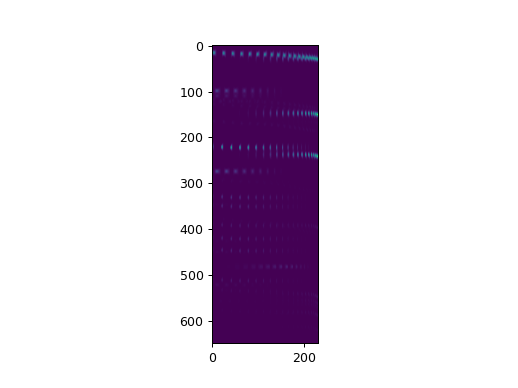

In [325]:
plt.imshow(I.T)

In [331]:
assert (Y // 77).max() == 2

In [334]:
np.unique(Y).shape

(231,)

In [769]:
# def standardize_input(X, Y):
#     X = condense2d(X, 150)
#     Y = Y[:, None]
#     return X, Y

NameError: name 'xrdutils' is not defined

> <ipython-input-769-89bc667aeb9e>(2)<module>()
      1 from importlib import reload
----> 2 reload(xrdutils)

ipdb> c


In [742]:
# def standardize_input(X, Y):
#     X = condense2d(X, 150)
#     Y = Y[:, None]
#     return X, Y



In [518]:
Y = np.hstack([np.repeat(v, 10) for v in Y])[None, :].T

In [522]:
%matplotlib notebook

<IPython.core.display.Javascript object>


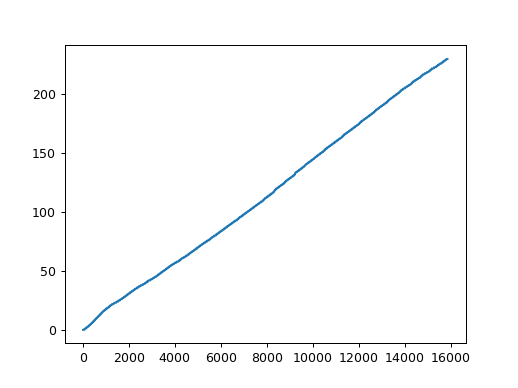

In [523]:
plt.plot(Y)

In [495]:
q.shape

(650,)

In [497]:
q.shape, X.shape

((650,), (1587, 650))

In [491]:
X.shape, Y.shape

((1587, 650), (1587,))

In [509]:
X.shape

(15870, 650)

<IPython.core.display.Javascript object>


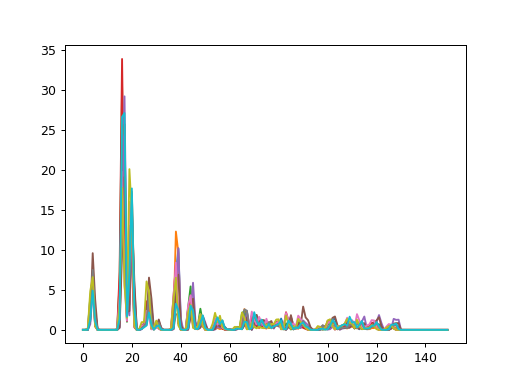

[[<matplotlib.lines.Line2D at 0x7fac67172250>],

In [527]:
[plt.plot(X[i]) for i in range(10)]

In [649]:
X, Y = standardize_input(X, Y)

In [739]:
X.shape, Y.shape

((1587, 650), (1587,))

In [482]:
np.hstack([np.repeat(i, per_class) for i in range(n_classes)])[None, :].T

NameError: name 'n_classes' is not defined

In [741]:
np.log(1.02 / .94)

0.0816780310142673

In [44]:
#X, y = augment(X, Y)
X, Y = xdu.augment(X, Y, -.06, .02, q, scale_type='shift')

KeyboardInterrupt: 

In [744]:
X.shape, Y.shape

((15870, 650), (15870, 1))

In [745]:
Xtest, Ytest = standardize_input(I, np.arange(231))

In [746]:
X.shape, Y.shape

((15870, 650), (15870, 1))

Data seems to have peak shifts larger than the +- 1 percent originally used:

In [747]:
XX, YY = standardize_input(X, Y)

In [749]:
write_train_test("data/AlLiFe_09927_100p_aug_8pshift_log/", XX, YY,
                 XX,\
                 YY)

In [759]:
prefix="AlLiFe_09927_100p_aug_8pshift_log"
%run ../../siamese-net-and-friends/train.py siamese-constrastive_1d XRD --train_path data/$prefix/train/ --test_path data/$prefix/test/\
    --name $prefix \
    --n_classes 231 --epochs 400

  0%|          | 0/198400 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 198400/198400 [48:25<00:00, 68.28it/s, epoch=399, train_loss=0.0327, val_loss=0.0328]  


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-AlLiFe_09927_100p_aug_8pshift_log-*


<Figure size 432x288 with 0 Axes>

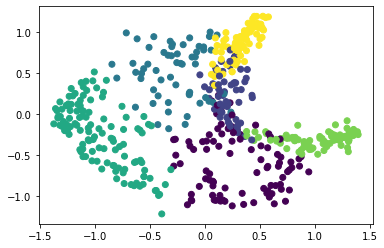

In [766]:
X_emb, y = utils.get_embedding(net, original_test_loader)
Xpca, ypred = gcluster(X_emb, N = 6)
xxpca, yypred = resample(Xpca, ypred, n_samples = 500)
plt.scatter(*(xxpca.T), c = yypred)
#plt.scatter(*(Xpca.T), c = ypred)

In [765]:
prefix="AlLiFe_09927_100p_aug_8pshift"
%run ../../siamese-net-and-friends/train.py siamese-constrastive_1d XRD --train_path data/$prefix/train/ --test_path data/$prefix/test/\
    --name $prefix \
    --n_classes 231 --epochs 400

4
./data/XRD


100%|██████████| 198400/198400 [55:07<00:00, 59.99it/s, epoch=399, train_loss=0.0277, val_loss=0.0273]  


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-AlLiFe_09927_100p_aug_8pshift-*


<Figure size 432x288 with 0 Axes>

### PCA + GMM clustering on raw XRD (original data)

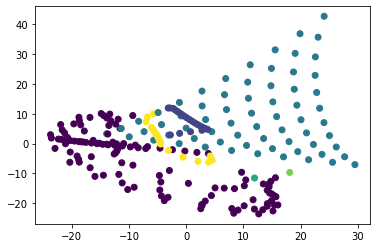

### t-SNE + GMM clustering on raw XRD (original data)

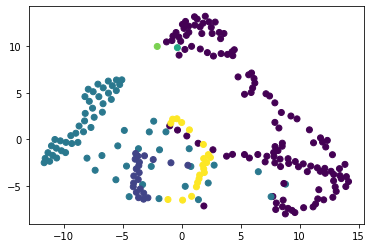

### Agglomerative clustering (with cosine distance affinity) on raw XRD (augmented data, subsampled)

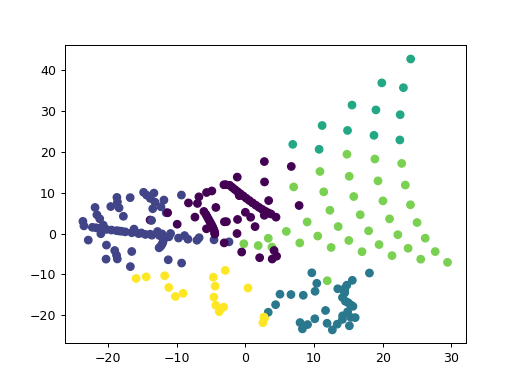

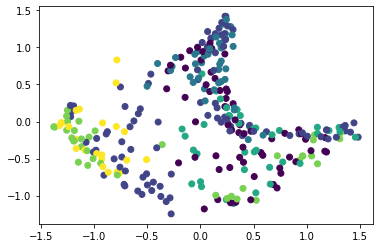

### GMM clustering on siamese network embeddings (augmented data, subsampled)

(PCA to reduce dimensions from 4 to 2 for visualization)

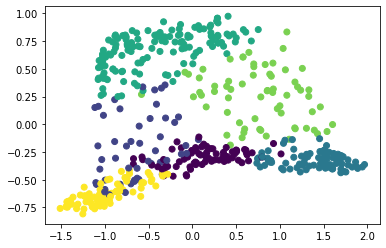

In [701]:
XX, yy = standardize_input(I, np.arange(231))

In [702]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=6, covariance_type='full').fit(XX)
ypred = gmm.predict(XX)

In [706]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xpca = pca.fit_transform(XX)

<IPython.core.display.Javascript object>


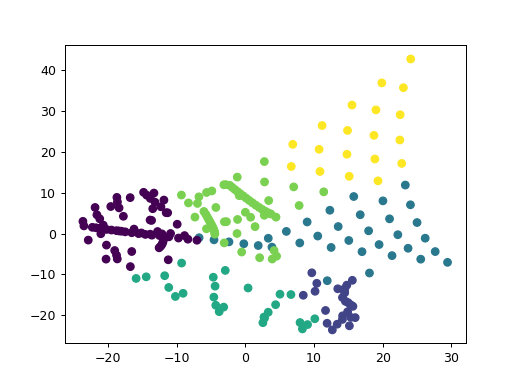

In [707]:
plt.scatter(*(Xpca.T), c = ypred)

<IPython.core.display.Javascript object>


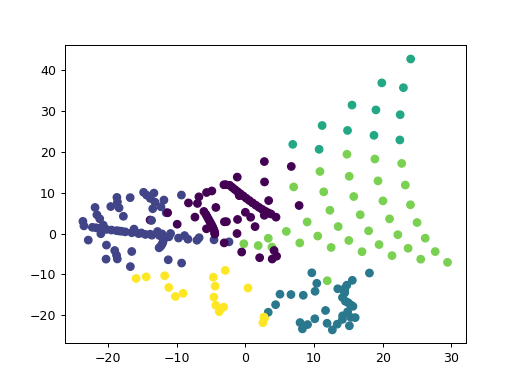

In [710]:
aglom = AgglomerativeClustering(6).fit(XX)
aglom.labels_
plt.scatter(*(Xpca.T), c = aglom.labels_)

In [761]:
#clusters = np.load("../outputs/AlLiFe_0992_clusterout.npy")
#clusters = np.load("../outputs/AlLiFe_0995_clusterout.npy")
# clusters = np.load("../outputs/AlLiFe_09927_100p_aug_clusterout_400.npy")
# clusters = np.load("../outputs/AlLiFe_09927_100p_aug_clusterout_800.npy")
#clusters = np.load("../outputs/AlLiFe_09927_100p_aug_clusterout_1600.npy")
clusters = np.load("../outputs/AlLiFe_09927_100p_aug_8pshift_clusterout_400.npy")
clusters_linear = np.load("../outputs/AlLiFe_09927_100p_aug_linear.npy")

clusters = ypred
cmap = np.vstack((Y.T[0], clusters)).T

In [762]:
def plot_clusters(clusters):
    comp_clust = []

    for i in range(6):
        m = (clusters == i)
        ii = np.unique(Y.T[0][(clusters == i)])
        comp_clust.append(composition[ii])
    fig, tax = ternary.figure()
    tax.set_title("Scatter Plot", fontsize=20)
    #tax.scatter(comp_clust[0], marker='s', color='red', label="Red Squares")
    for i in range(6):
        tax.scatter(comp_clust[i], marker='s')
    tax.legend()

In [558]:
def plot_clusters2(clusters):
    comp_clust = []

    for i in range(6):
        m = (clusters == i)
        comp_clust.append(composition[m])
    fig, tax = ternary.figure()
    tax.set_title("Scatter Plot", fontsize=20)
    #tax.scatter(comp_clust[0], marker='s', color='red', label="Red Squares")
    for i in range(6):
        tax.scatter(comp_clust[i], marker='s')
    tax.legend()

In [573]:
def cluster_tally(i):
    tmp = np.unique(Y.T[0][(clusters == i)], return_counts = True)
    # pat index, counts, cluster index
    return tmp[0], tmp[1], np.repeat(i, len(tmp[0]))

In [757]:
from functools import reduce

pat_cluster_tallies = sorted(reduce(lambda a, b: a + b,
              [list(zip(*cluster_tally(i))) 
    for i in range(6)]), reverse = True)


# Augmented inputs from the same input pattern/dummy class can end up in different clusters, so we
# need to figure out the majority cluster for each input pattern.
res = []
seen = set()
for elt in pat_cluster_tallies:
    if elt[0] not in seen:
        seen.add(elt[0])
        res.append((elt[2], elt[0])) # list of tuples (cluster index, pattern index)
c_index, p_index = np.array(list(map(np.array, (zip(*res)))))

comp_clust = []

for i in range(6):
    ii = p_index[(c_index == i)]
    comp_clust.append(composition[ii])

In [624]:
# comp_clust = []

# for i in range(6):
#     m = (clusters == i)
#     ii = np.unique(Y.T[0][(clusters == i)])
#     comp_clust.append(composition[ii])

<IPython.core.display.Javascript object>


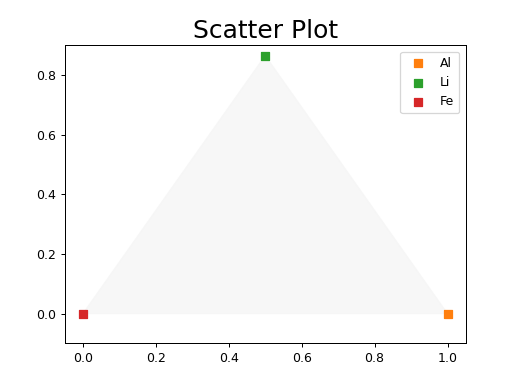

In [696]:
import ternary
fig, tax = ternary.figure()
tax.set_title("Scatter Plot", fontsize=20)
#tax.scatter(comp_clust[0], marker='s', color='red', label="Red Squares")
tax.scatter([[1, 0 , 0]], marker='s', label = 'Al')
tax.scatter([[0, 1 , 0]], marker='s', label = 'Li')
tax.scatter([[0, 0 , 1]], marker='s', label = 'Fe')
tax.legend()  

### Siamese network-derived clusters in ternary composition space

<IPython.core.display.Javascript object>


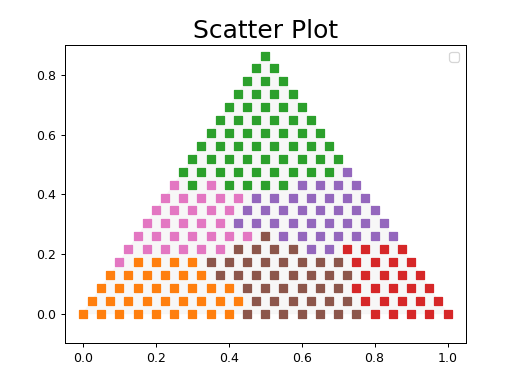

No handles with labels found to put in legend.


In [613]:
import ternary
fig, tax = ternary.figure()
tax.set_title("Scatter Plot", fontsize=20)
#tax.scatter(comp_clust[0], marker='s', color='red', label="Red Squares")
for i in range(6):
    tax.scatter(comp_clust[i], marker='s')
tax.legend()

### Compare to agglomerative clustering (with cosine affinity)

<IPython.core.display.Javascript object>


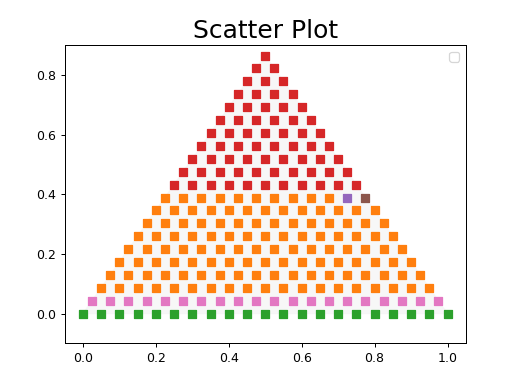

No handles with labels found to put in legend.


In [559]:
plot_clusters2(clusters_linear)

In [763]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, fowlkes_mallows_score

from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=11, random_state=0).fit(X)
kmeans.labels_

#kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

aglom = AgglomerativeClustering(11).fit(X)
aglom.labels_

ypred = kmeans.predict(X)

from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=6, covariance_type='full').fit(X)
ypred = gmm.predict(X)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xpca = pca.fit_transform(X)

In [692]:
from sklearn.utils import resample

In [693]:
xxpca, yypred = resample(Xpca, ypred, n_samples = 500)

<IPython.core.display.Javascript object>


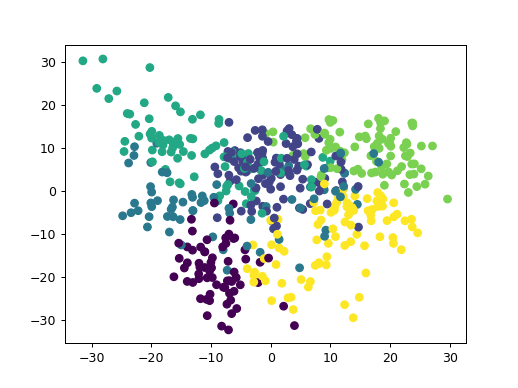

In [694]:
plt.scatter(*(xxpca.T), c = yypred)

No handles with labels found to put in legend.


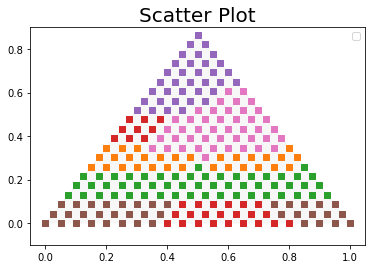

In [764]:
import ternary
fig, tax = ternary.figure()
tax.set_title("Scatter Plot", fontsize=20)
#tax.scatter(comp_clust[0], marker='s', color='red', label="Red Squares")
for i in range(6):
    tax.scatter(comp_clust[i], marker='s')
tax.legend()

4
./data/XRD


 60%|██████    | 2976/4960 [00:48<00:32, 60.93it/s, epoch=5, train_loss=0.0628, val_loss=0.0622] 


KeyboardInterrupt: 

> /Users/ollie/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py(386)max_pool1d_with_indices()
    384         _stride = torch.jit._unwrap_optional(stride)
    385     return torch.max_pool1d_with_indices(
--> 386         input, kernel_size, _stride, padding, dilation, ceil_mode)
    387 
    388 

ipdb> c


<IPython.core.display.Javascript object>


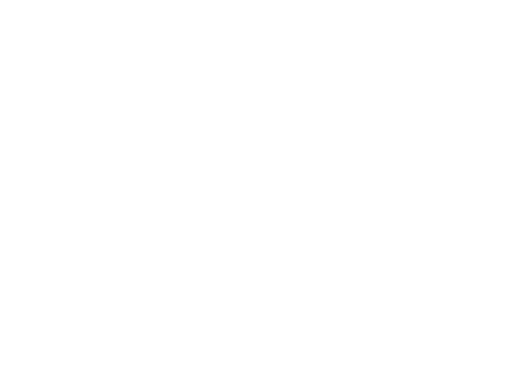

In [691]:
prefix="testing"
%run ../../siamese-net-and-friends/train.py siamese-constrastive_1d XRD --train_path data/$prefix/train/ --test_path data/$prefix/test/\
    --name $prefix \
    --n_classes 231 --epochs 10

## Process real instance data

In [23]:
path = '../xrdc/inputs/real_instance_data/inst12_Cu3Bi4V6.txt'

# deprecated, use grid_data.group_by_coord
# from k_means_constrained import KMeansConstrained as KMC
# def group_real_instance(cpairs, n_neighbor = 6):
#     """
#     Returns group indices
#     """
#     N = cpairs.shape[0]
#     n_clusters = N // n_neighbor
#     kmeans = KMC(n_clusters=n_clusters, size_min = n_neighbor).fit(cpairs)
#     km_y = kmeans.labels_
#     return km_y



def load_real_instance(path):
    with open(path, 'r') as f:
        lines = f.readlines()

    str_to_ndarr = lambda line: np.array(line.split('=')[1].split(',')).astype(float)

    offset = 1
    waferx, wafery = str_to_ndarr(lines[15 + offset]), str_to_ndarr(lines[16 + offset])
    q = str_to_ndarr(lines[19 + offset])

    I = np.vstack([str_to_ndarr(l) for l in lines[20 + offset: -1]])

    assert I.shape[0] == len(waferx)
    return waferx, wafery, q, I
    # df = pd.read_csv(path, skiprows=17, header = None, skipfooter = 231)
    # df[0] = df.iloc[:, 0].apply(lambda x: x.split('=')[1])
    # df = df.astype(float)

In [7]:
def make_train_neighbor_based_embedding(waferx, wafery, q, I, prefix = ''):
    def run(scale_min, scale_max, n_augment, n_neighbor):
        name = "{}_scalemin{}_scalemax{}_naugment{}_nneighbor{}".format(prefix, scale_min, scale_max, n_augment, n_neighbor)
        

In [22]:
!stat $path

16777221 6360325 -rw-r--r-- 1 ollie staff 0 1807431 "Mar 29 17:13:47 2021" "Mar 29 17:13:45 2021" "Mar 29 17:13:45 2021" "Mar 29 17:13:45 2021" 4096 3536 0 ../xrdc/inputs/synthetic_instance_data/synthinst69_t0_n21_p100_r50_s1_inst.txt


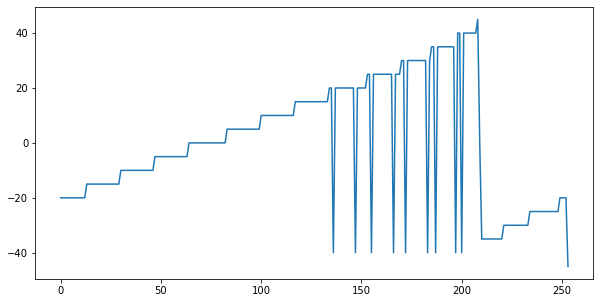

In [379]:
plt.plot(wafery)

In [25]:
waferx, wafery, q, I = load_real_instance(path)
cpairs = np.vstack((waferx, wafery)).T

X, Y = I, grid_data.group_by_coord(cpairs, n_neighbor = 6)

XX, YY = xdu.augment(X, Y, .8, 1.2, q, N = 10, scale_type = 'scale')

XX, YY = xdu.standardize_input(XX, YY)

X, Y = xdu.standardize_input(X, Y)

In [27]:
xdu.write_train_test("data/inst12_Cu3Bi4V6/", XX, YY,
                 X,\
                 Y)

In [26]:
from importlib import reload
reload(train)

<module 'siamese_xrd.train' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/siamese_xrd-1.0-py3.7.egg/siamese_xrd/train.py'>

In [28]:
rm -r ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6-gif

rm: ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6-gif: No such file or directory


In [5]:
%pdb

Automatic pdb calling has been turned ON


In [33]:
from siamese_xrd import train, utils

In [161]:
prefix="inst12_Cu3Bi4V6"
net, train_loader, test_loader, original_train_loader, original_test_loader, add_prefix =\
    train.run("siamese-constrastive_1d", "XRD", "data/{}/train/".format(prefix), "data/{}/test".format(prefix), name = prefix,
              n_classes = 42, epochs = 200)

  0%|          | 0/16000 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 16000/16000 [05:22<00:00, 49.62it/s, epoch=199, train_loss=0.193, val_loss=0.156]


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6-*


In [134]:
!pip install bayes_opt

ERROR: Could not find a version that satisfies the requirement bayes_opt (from versions: none)
ERROR: No matching distribution found for bayes_opt


In [229]:
from bayes_opt import UtilityFunction

In [ ]:
from bayes_opt import BayesianOptimization

num_random_points = 5
num_iter = 20

neighbor_range = (3, 12.001)
augment_range = (5, 20)
scale_range = (0, .5)

def run_and_eval_real_instance(n_neighbor, n_augment, scale_size, base_prefix = 'inst12_Cu3Bi4V6'):
    X, Y = I, grid_data.group_by_coord(cpairs, n_neighbor = int(n_neighbor))

    XX, YY = xdu.augment(X, Y, 1 - scale_size / 2, 1 + scale_size / 2, q, N = int(n_augment), scale_type = 'scale')

    XX, YY = xdu.standardize_input(XX, YY)

    X, Y = xdu.standardize_input(X, Y)
    
    prefix = "{}_n_neighbor_{}_scale_size_{}_n_augment_{}".format(base_prefix, n_neighbor, scale_size, n_augment)
    xdu.write_train_test("data/{}/".format(prefix), XX, YY,
                     X,\
                     Y)
    
    net, train_loader, test_loader, original_train_loader, original_test_loader, add_prefix =\
        train.run("siamese-constrastive_1d", "XRD", "data/{}/train/".format(prefix), "data/{}/test".format(prefix), name = prefix,
              n_classes = Y.max() + 1, epochs = 100)
    
    score = metrics.approx_mean_density(X, Y, net, utils.get_embedding, .2)
    print(score)
    return score

    


optimizer = BayesianOptimization(f=run_and_eval_real_instance,
            pbounds={'n_neighbor': neighbor_range,
                     'n_augment':augment_range,  # *16
                     'scale_size':scale_range},
                     verbose=2)
 
optimizer.maximize(init_points=num_random_points, n_iter=num_iter)
print('nbest result:', optimizer.max)


|   iter    |  target   | n_augment | n_neig... | scale_... |
-------------------------------------------------------------


  0%|          | 0/4000 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 4000/4000 [02:14<00:00, 29.85it/s, epoch=99, train_loss=0.067, val_loss=0.0738] 


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6_n_neighbor_3.9922487275142466_scale_size_0.19235358602373925_n_augment_5.581761697044432-*
0.4136169160849457
|  1        |  0.4136   |  5.582    |  3.992    |  0.1924   |


  0%|          | 0/8000 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 8000/8000 [02:15<00:00, 58.98it/s, epoch=99, train_loss=0.0969, val_loss=0.0955] 


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6_n_neighbor_5.306678622481531_scale_size_0.37453836931066953_n_augment_10.640815649165953-*
0.6849482472906283
|  2        |  0.6849   |  10.64    |  5.307    |  0.3745   |


  0%|          | 0/12700 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 12700/12700 [02:51<00:00, 74.05it/s, epoch=99, train_loss=0.0952, val_loss=0.091]  


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6_n_neighbor_6.564692831823182_scale_size_0.3243474366180358_n_augment_16.900427881585134-*
1.0915226712709147
|  3        |  1.092    |  16.9     |  6.565    |  0.3243   |


  0%|          | 0/12700 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 12700/12700 [02:55<00:00, 72.36it/s, epoch=99, train_loss=0.0822, val_loss=0.0878] 


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6_n_neighbor_6.5530796595285485_scale_size_0.1494994752756118_n_augment_16.926171119686117-*
0.7101334464613994
|  4        |  0.7101   |  16.93    |  6.553    |  0.1495   |


  0%|          | 0/13500 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 13500/13500 [02:42<00:00, 82.90it/s, epoch=99, train_loss=0.0621, val_loss=0.0586] 


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6_n_neighbor_10.006973018882093_scale_size_0.05869954448365694_n_augment_17.81419787548707-*
0.6376840234306834
|  5        |  0.6377   |  17.81    |  10.01    |  0.0587   |


  0%|          | 0/5600 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 5600/5600 [01:37<00:00, 57.47it/s, epoch=99, train_loss=0.143, val_loss=0.149]


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6_n_neighbor_10.076976330802072_scale_size_0.2396383172319077_n_augment_7.031945505692673-*
0.29009658874339966
|  6        |  0.2901   |  7.032    |  10.08    |  0.2396   |


  0%|          | 0/5600 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 5600/5600 [01:32<00:00, 60.43it/s, epoch=99, train_loss=0.0965, val_loss=0.0982]


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6_n_neighbor_10.254813344505457_scale_size_0.37019951655995176_n_augment_7.5928015978989265-*
0.5562557224075272
|  7        |  0.5563   |  7.593    |  10.25    |  0.3702   |


  0%|          | 0/12700 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 12700/12700 [02:56<00:00, 72.13it/s, epoch=99, train_loss=0.0687, val_loss=0.0647] 


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6_n_neighbor_6.655731777425201_scale_size_0.3808494205350713_n_augment_16.859353224552166-*
0.8741865158430956
|  8        |  0.8742   |  16.86    |  6.656    |  0.3808   |


  0%|          | 0/12700 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 12700/12700 [02:46<00:00, 76.30it/s, epoch=99, train_loss=42.2, val_loss=19.4]   


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6_n_neighbor_6.541716684028556_scale_size_0.4252065497757785_n_augment_16.928492900617602-*
0.7215143747274227
|  9        |  0.7215   |  16.93    |  6.542    |  0.4252   |


  0%|          | 0/7200 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 7200/7200 [01:51<00:00, 64.64it/s, epoch=99, train_loss=0.086, val_loss=0.0798]  


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6_n_neighbor_9.952101093378367_scale_size_0.11774810638999955_n_augment_9.25627412063302-*
0.6808572862037365
|  10       |  0.6809   |  9.256    |  9.952    |  0.1177   |


In [371]:
def run_and_eval_real_instance_2(n_neighbor, n_augment, scale_size, base_prefix = 'inst12_Cu3Bi4V6', epochs = 100):
    X, Y = I, grid_data.group_by_coord(cpairs, n_neighbor = int(n_neighbor))

    XX, YY = xdu.augment(X, Y, 1 - scale_size / 2, 1 + scale_size / 2, q, N = int(n_augment), scale_type = 'scale')

    XX, YY = xdu.standardize_input(XX, YY)

    X, Y = xdu.standardize_input(X, Y)
    
    prefix = "{}_n_neighbor_{}_scale_size_{}_n_augment_{}".format(base_prefix, n_neighbor, scale_size, n_augment)
    xdu.write_train_test("data/{}/".format(prefix), XX, YY,
                     X,\
                     Y)
    
    net, train_loader, test_loader, original_train_loader, original_test_loader, add_prefix, stats_collector =\
        train.run("siamese-constrastive_1d", "XRD", "data/{}/train/".format(prefix), "data/{}/test".format(prefix), name = prefix,
              n_classes = Y.max() + 1, epochs = epochs)
    
    score = metrics.approx_mean_density(X, Y, net, utils.get_embedding, .2)
    print(score)
    
    return net, train_loader, test_loader, original_train_loader, original_test_loader, add_prefix, stats_collector

In [346]:
print('nbest result:', optimizer.max)

nbest result: {'target': 1.5615290633038983, 'params': {'n_augment': 16.888657601477973, 'n_neighbor': 6.6733923452741974, 'scale_size': 0.21177263613219738}}


Rerun with the best hyperparameter combination

In [372]:
net, train_loader, test_loader, original_train_loader, original_test_loader, add_prefix, stats_collector =\
    run_and_eval_real_instance_2(7, 17, .2, epochs = 100)

  0%|          | 0/13500 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 13500/13500 [03:44<00:00, 60.23it/s, epoch=99, train_loss=0.102, val_loss=0.0947]  


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6_n_neighbor_7_scale_size_0.2_n_augment_17-*
0.8521465249734926


In [263]:
utility_function = UtilityFunction(kind="ucb", kappa=5, xi=0)
utility = utility_function.utility(grid, optimizer._gp, 0)

In [228]:
def posterior(optimizer, x_obs, y_obs, grid):
    optimizer._gp.fit(x_obs, y_obs)

    mu, sigma = optimizer._gp.predict(grid, return_std=True)
    return mu, sigma

def plot_gp(optimizer, x, y):
    fig = plt.figure(figsize=(16, 10))
    steps = len(optimizer.space)
    fig.suptitle(
        'Gaussian Process and Utility Function After {} Steps'.format(steps),
        fontdict={'size':30}
    )
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    x_obs = np.array([[res["params"]["x"]] for res in optimizer.res])
    y_obs = np.array([res["target"] for res in optimizer.res])
    
    mu, sigma = posterior(optimizer, x_obs, y_obs, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility_function = UtilityFunction(kind="ucb", kappa=5, xi=0)
    utility = utility_function.utility(x, optimizer._gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

In [148]:
from importlib import reload
reload(metrics)

<module 'xrdc.metrics' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/metrics.py'>

In [146]:
metrics.default_bw(X / X.std())

0.33039484049128853

In [373]:
metrics.approx_mean_density(XX, YY, net, utils.get_embedding, .2)

0.21428310859700977

In [125]:
metrics.approx_mean_density(X, Y, net, utils.get_embedding)

0.706725975281719

In [356]:
reload(datasets)

<module 'xrdc.datasets' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/datasets.py'>

In [374]:
X0, Y0 = datasets.dataloader_to_ndarr(original_test_loader)

In [375]:
metrics.approx_mean_density(X0, Y0, net, utils.get_embedding, .2)

0.8521465249734926

In [130]:
metrics.approx_mean_density(X, Y, net, utils.get_embedding)

0.5783290317582972

In [105]:
%matplotlib inline

In [309]:
num = 100
x, y, z = np.linspace(*neighbor_range, num = num), np.linspace(*augment_range, num = num),\
    np.linspace(*scale_range, num = num)
yy, xx, zz = np.meshgrid(x, y, z)

grid = np.vstack((xx.ravel(), yy.ravel(), zz.ravel())).T

In [315]:
x_obs = np.array([np.array(list(res["params"].values())) for res in optimizer.res])
y_obs = np.array([res["target"] for res in optimizer.res])

mu, sigma = posterior(optimizer, x_obs, y_obs, grid)

# Predictions are all close to the mean so we need denser sampling
optimizer._gp.fit(x_obs, y_obs)
optimizer._gp.predict(x_obs + 1e-5, return_std=True)

Compare the maximum local density hyperparameter combination with a less good one:

In [335]:
print(x_obs[6], y_obs[6])
net_cmp = torch.load("tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6_n_neighbor_10.254813344505457_scale_size_0.37019951655995176_n_augment_7.5928015978989265-model.serialized")
loader_cmp = torch.load("tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6_n_neighbor_10.254813344505457_scale_size_0.37019951655995176_n_augment_7.5928015978989265-original_test_loader.serialized")

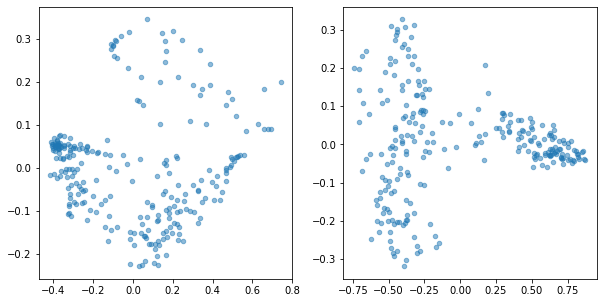

In [343]:
pca, Xpca = vis.xrd_to_pca_original(net, original_test_loader, utils.get_embedding)

plt.subplot(1, 2, 1)
plt.scatter(*(Xpca.T) , cmap='jet', alpha = .5, s = 20)
# plt.vlines(x = -.4, ymin = -.2, ymax = .2, color = 'black')
# plt.vlines(x = -.3, ymin = -.2, ymax = .2, color = 'black')
# plt.hlines(y = .08, xmin = -.7, xmax = .8, color = 'black')
# plt.hlines(y = .01, xmin = -.7, xmax = .8, color = 'black')


plt.subplot(1, 2, 2)
pca, Xpca = vis.xrd_to_pca_original(net_cmp, loader_cmp, utils.get_embedding)

plt.scatter(*(Xpca.T) , cmap='jet', alpha = .5, s = 20)


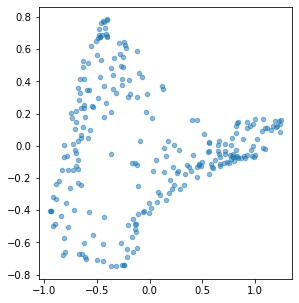

In [367]:
import matplotlib.pyplot as plt
plt.semilogy()
plt.plot(stats_collector['train_loss'])
plt.plot(stats_collector['val_loss'])

pca, Xpca = vis.xrd_to_pca_original(net, original_test_loader, utils.get_embedding)

plt.subplot(1, 2, 1)
plt.scatter(*(Xpca.T) , cmap='jet', alpha = .5, s = 20)


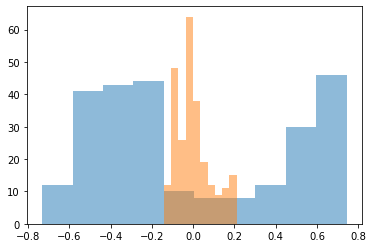

In [46]:
plt.hist(Xpca[:, 0], alpha = .5);
plt.hist(Xpca[:, 1], alpha = .5);

In [225]:
# pick out samples that look well-clustered
mask = ((Xpca[:, 0] > -.4) & (Xpca[:, 0]  < -.3) & (Xpca[:, 1] < .08) & (Xpca[:, 1] > .01))

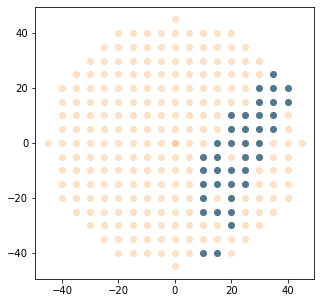

In [226]:
plt.rcParams["figure.figsize"]=(5, 5)

plt.scatter(waferx[mask], wafery[mask])
plt.scatter(waferx, wafery, alpha = .2)

In [83]:
def second_peak_I(arr):
    return arr[:, 22:28].sum(axis = 1)

39

In [189]:
second_peak_I(X[mask])

array([ 2.66676102e-01,  9.38994900e-02,  6.52327578e+00,  6.17352177e+00,
        2.49123909e+00, -6.48604181e-02,  3.99710299e-01,  6.98439541e-02,
        4.10927333e+00,  1.08877450e+01,  5.12893972e+00,  2.09498503e-01,
        5.42446216e-02,  7.26584362e-01,  1.05310744e+01,  7.59567452e+00,
        2.09334370e+00,  1.52068361e-01,  1.87785053e-01,  7.62281395e+00,
        9.69930977e+00,  4.30441759e+00,  2.16270571e-01,  3.37874887e+00,
        1.11592152e+01,  7.15804056e+00,  8.22999600e+00,  8.70044952e+00,
        9.67356246e-01,  3.44110311e+00,  9.71709635e+00,  7.77448472e+00,
        1.00018880e+01,  7.73835519e+00,  4.54125186e-01,  6.57900464e+00,
        5.11750556e+00,  1.34186444e+00,  3.10118860e-01,  3.74377258e+00,
        7.82234656e-03,  3.71502179e-01,  1.82563153e+00,  8.18145918e+00,
        3.92951426e+00,  1.02409406e-01,  8.66963482e-02,  4.58476401e-01,
        1.20224804e-01,  9.06925641e+00,  5.59633109e+00,  9.37591315e-01,
        1.03422902e-01])

### Heatmap of the second peak's intensity

This is the peak that chnges in intensity within the 'single-phase' region identified from the latent space distribution.

Text(0.5, 1.0, "identified 'single-phase' region (blue)")

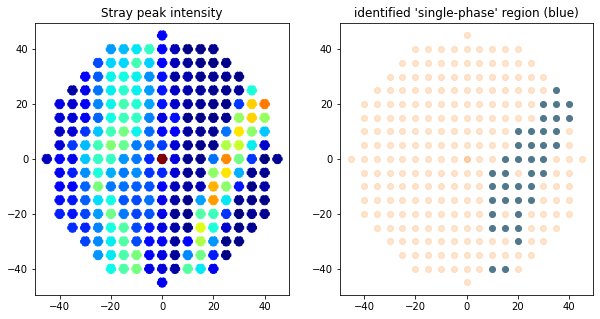

In [227]:
plt.rcParams["figure.figsize"]=(10, 5)

plt.subplot(1, 2, 1)

#plt.scatter(waferx[mask], wafery[mask], c = second_peak_I(X[mask]))
plt.scatter(waferx, wafery, alpha = 1, c = second_peak_I(X), cmap = 'jet', s = 90, linestyle = '--')
plt.title('Stray peak intensity')

plt.subplot(1, 2, 2)
plt.scatter(waferx[mask], wafery[mask])
plt.scatter(waferx, wafery, alpha = .2)
plt.title("identified 'single-phase' region (blue)")

In [84]:
%matplotlib notebook

In [181]:
def waterfall(X, spacing = 10):
    for i, row in enumerate(X):
        plt.plot(row + i * spacing)

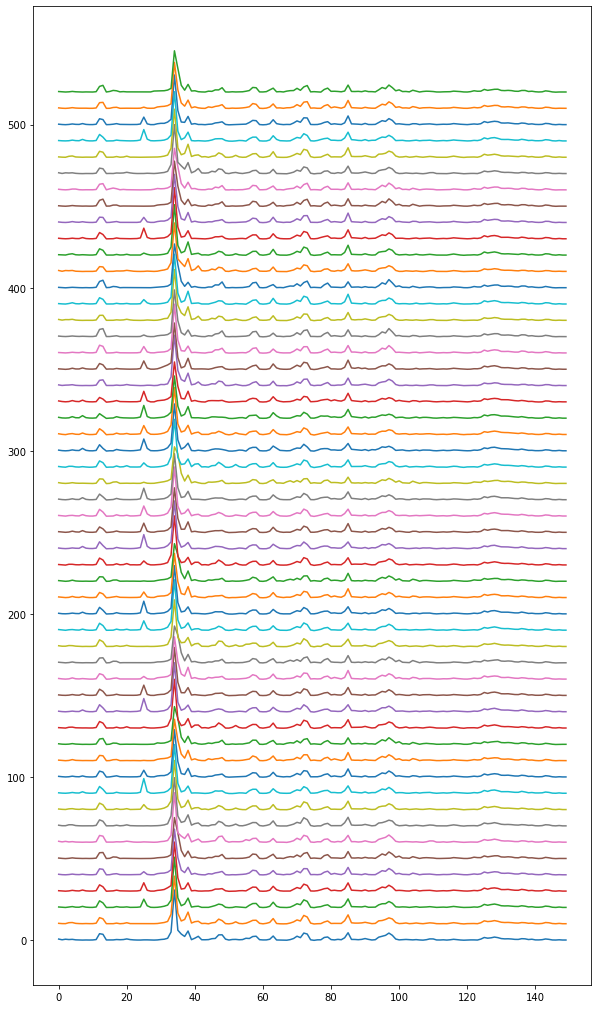

In [188]:
plt.rcParams["figure.figsize"]=(10, 18)
waterfall(X[mask])
#plt.xlim(22, 27)

In [103]:
X[::6].shape

(43, 150)

<IPython.core.display.Javascript object>


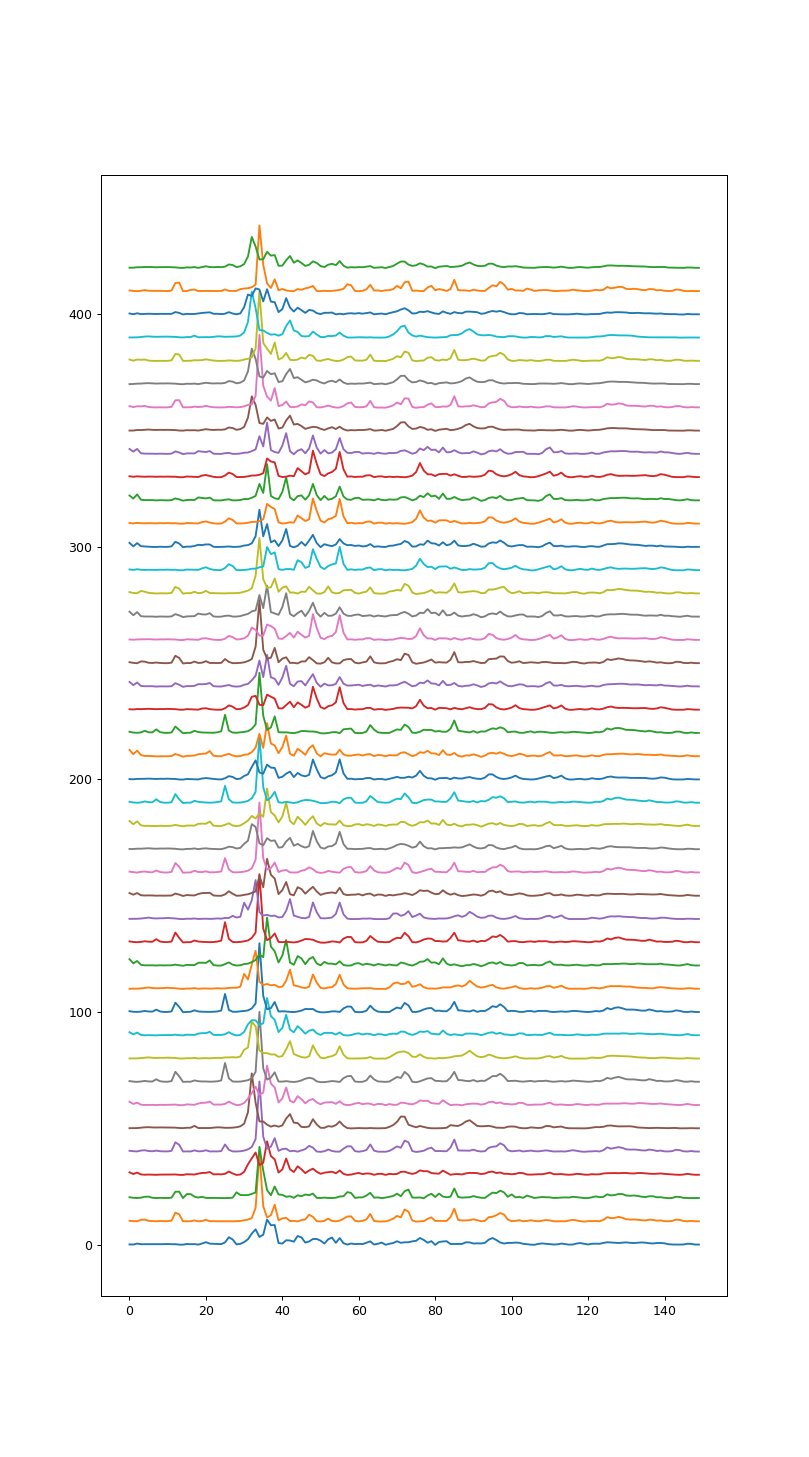

In [102]:
plt.rcParams["figure.figsize"]=(10, 18)
waterfall(X[::6])

In [3]:
rm -r ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6-gif

In [50]:
prefix="inst12_Cu3Bi4V6"
%run ../../siamese-net-and-friends/train.py siamese-constrastive_1d XRD --train_path data/$prefix/train/ --test_path data/$prefix/test/\
    --name $prefix \
    --n_classes 42 --epochs 200

  0%|          | 0/16000 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 16000/16000 [05:43<00:00, 46.58it/s, epoch=199, train_loss=0.0514, val_loss=0.051] 


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6-*


In [18]:
prefix="inst12_Cu3Bi4V6"
%run ../../siamese-net-and-friends/train.py siamese-constrastive_1d XRD --train_path data/$prefix/train/ --test_path data/$prefix/test/\
    --name $prefix \
    --n_classes 42 --epochs 200

  0%|          | 0/16000 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 16000/16000 [04:48<00:00, 55.39it/s, epoch=199, train_loss=0.0556, val_loss=0.0547] 


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6-*


In [6]:
from importlib import reload
reload(vis)

<module 'xrdc.visualization' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/visualization.py'>

In [27]:
X, Y = utils.get_embedding(net, original_test_loader)
Xpca = vis.do_pca(X)[1]

In [66]:
# #pca, Xpca = vis.xrd_to_embedding(*original_test_loader, net, utils.get_embedding)
# plt.scatter(*(Xpca.T) , cmap='jet', alpha = .5, s = 2)

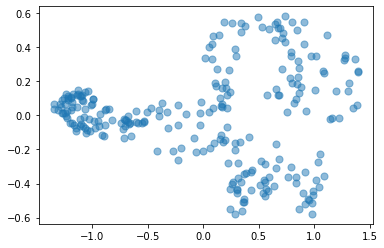

In [65]:
_, Xpca = vis.xrd_to_pca(*xdu.standardize_input(X, Y), net, utils.get_embedding)
plt.scatter(*(Xpca.T) , cmap='jet', alpha = .5, s = 50)

In [168]:
name = prefix + '_400epoch'

%run ../../siamese-net-and-friends/train.py siamese-constrastive_1d XRD --train_path data/$prefix/train/ --test_path data/$prefix/test/\
    --name $name \
    --n_classes 42 --epochs 400

  0%|          | 0/32000 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 32000/32000 [09:08<00:00, 58.32it/s, epoch=399, train_loss=0.0281, val_loss=0.0262] 


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-inst12_Cu3Bi4V6_400epoch-*


<Figure size 432x288 with 0 Axes>

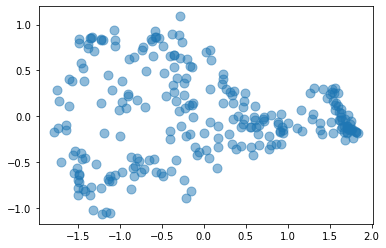

In [169]:
pca, Xpca = vis.xrd_to_embedding(*xdu.standardize_input(X, Y), net, utils.get_embedding)
plt.scatter(*(Xpca.T) , cmap='jet', alpha = .5, s = 80)